![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

The Finance Toolkit can take in any dataset which means it works very well with the software and APIs from any other provider let is be Intrinio, OpenBB, Yahoo Finance, Quandl, etc. For this illustration, I have collected custom statements and have imported them as a CSV file but as you can imagine this would also work with direct API calls. This dataset is obtained from Yahoo Finance, which can be collected via `yfinance`. Note that the `yfinance` library is not part of the Finance Toolkit and needs to be installed separately.

In [1]:
import pandas as pd

from financetoolkit import Toolkit

First, let's read in the custom dataset obtained from Yahoo Finance.

In [2]:
# Balance Sheet Statements
tsla_balance = pd.read_csv("external_datasets/TSLA_balance.csv", index_col=0)
googl_balance = pd.read_csv("external_datasets/GOOGL_balance.csv", index_col=0)

# Income Statements
tsla_income = pd.read_csv("external_datasets/TSLA_income.csv", index_col=0)
googl_income = pd.read_csv("external_datasets/GOOGL_income.csv", index_col=0)

# Cash Flow Statements
tsla_cash = pd.read_csv("external_datasets/TSLA_cash.csv", index_col=0)
googl_cash = pd.read_csv("external_datasets/GOOGL_cash.csv", index_col=0)

# Show one of the datasets
tsla_income

,2024-12-31,2023-12-31,2022-12-31,2021-12-31,2020-12-31
TaxEffectOfUnusualItems,-1.368000e+08,0.000000e+00,-1.408000e+07,2.970000e+06,NaN
TaxRateForCalcs,2.000000e-01,2.100000e-01,8.000000e-02,1.100000e-01,NaN
NormalizedEBITDA,1.539200e+10,1.479600e+10,1.783300e+10,9.598000e+09,NaN
TotalUnusualItems,-6.840000e+08,0.000000e+00,-1.760000e+08,2.700000e+07,NaN
TotalUnusualItemsExcludingGoodwill,-6.840000e+08,0.000000e+00,-1.760000e+08,2.700000e+07,NaN
NetIncomeFromContinuingOperationNetMinorityInterest,7.130000e+09,1.499900e+10,1.258300e+10,5.524000e+09,NaN
ReconciledDepreciation,5.368000e+09,4.667000e+09,3.747000e+09,2.911000e+09,NaN
ReconciledCostOfRevenue,8.024000e+10,7.911300e+10,6.060900e+10,4.021700e+10,NaN
EBITDA,1.470800e+10,1.479600e+10,1.765700e+10,9.625000e+09,NaN
EBIT,9.340000e+09,1.012900e+10,1.391000e+10,6.714000e+09,NaN


Then, it's time to acquire the normalization files via the Toolkit to be used to normalize the results.

In [3]:
Toolkit("TSLA").get_normalization_files()

2025-04-27 21:53:31 - financetoolkit - INFO - Files are being saved to /Users/jeroenbouma/Downloads. Please see the following: https://www.jeroenbouma.com/projects/financetoolkit/external-datasets to understand how to work with these files. In essence, all it requires is to match up the rows in your dataframe with the normalization format.


With this information, by copying over each name as defined by Yahoo Finance for the balance, income and cash flow statements as also defined above, the normalisation files can be filled. The result can be found within the `examples/external_datasets` folder of the project as found [here](https://github.com/JerBouma/FinanceToolkit/tree/main/examples).

The way you should be filling these sheets is by looking at the index names of the DataFrame depicted above and placing the name at the correct position of the first column of the CSV (Column A). As an example the name `Total revenue` can be matched in the `income.csv` with `Revenue`. Do not change the names in Column B since the FinanceToolkit is dependent on those. So for the `income.csv` this will look like:

| Income                                     | Generic                                     |
| :----------------------------------------- | :------------------------------------------ |
| TotalRevenue                               | Revenue                                     |
| OperatingRevenue                           | Operating Revenue                           |
| CostOfRevenue                              | Cost of Goods Sold                          |
| GrossProfit                                | Gross Profit                                |
| OperatingExpense                           | Operating Expenses                          |
| SellingGeneralAndAdministration            | Selling, General and Administrative Expenses |
| ResearchAndDevelopment                     | Research and Development Expenses           |
| OperatingIncome                            | Operating Income                            |
| NetNonOperatingInterestIncomeExpense        | Net Non Operating Interest Income Expense   |
| InterestIncomeNonOperating                 | Interest Income Non Operating               |
| InterestExpenseNonOperating                | Interest Expense Non Operating              |
| OtherIncomeExpense                         | Total Other Income Expenses                 |
| OtherNonOperatingIncomeExpenses            | Other Non Operating Income Expenses         |
| PretaxIncome                               | Income Before Tax                           |
| TaxProvision                               | Income Tax Expense                          |
| NetIncomeCommonStockholders                | Net Income Common Stockholders              |
| DilutedNIAvailtoComStockholders            | Diluted NI Available to Common Stockholders  |
| BasicEPS                                   | EPS                                         |
| DilutedEPS                                 | EPS Diluted                                 |
| BasicAverageShares                         | Weighted Average Shares                     |
| DilutedAverageShares                       | Weighted Average Shares Diluted             |
| TotalOperatingIncomeAsReported             | Total Operating Income as Reported          |
| TotalExpenses                              | Cost and Expenses                           |
| NetIncomeFromContinuingAndDiscontinuedOperation | Net Income from Continuing and Discontinued Operation |
| NormalizedIncome                           | Normalized Income                           |
| NetIncome                                  | Net Income                                  |
| InterestIncome                             | Interest Income                             |
| InterestExpense                            | Interest Expense                            |
| EBIT                                       | EBIT                                        |
| EBITDA                                     | EBITDA                                      |
| ReconciledCostOfRevenue                    | Reconciled Cost of Revenue                  |
| ReconciledDepreciation                     | Reconciled Depreciation                   |
| NetIncomeFromContinuingOperationNetMinorityInterest | Net Income from Continuing Operation Net Minority Interest |
| NormalizedEBITDA                           | Normalized EBITDA                           |
| TaxRateForCalcs                            | Tax Rate for Calcs                          |

Now it's time to convert each dataset in the right format.

In [4]:
from financetoolkit import helpers

balance_sheets = helpers.combine_dataframes(
    {
        "TSLA": tsla_balance,
        "GOOGL": googl_balance,
    },
)
income_statements = helpers.combine_dataframes(
    {
        "TSLA": tsla_income,
        "GOOGL": googl_income,
    },
)
cash_flow_statements = helpers.combine_dataframes(
    {"TSLA": tsla_cash, "GOOGL": googl_cash},
)

# Show the Results
balance_sheets

2024-12-31  \
GOOGL TreasurySharesNumber                                  NaN   
      OrdinarySharesNumber                        12211000000.0   
      ShareIssued                                 12211000000.0   
      TotalDebt                                   25461000000.0   
      TangibleBookValue                          293199000000.0   
...                                                         ...   
TSLA  CashCashEquivalentsAndShortTermInvestments  36563000000.0   
      OtherShortTermInvestments                   20424000000.0   
      CashAndCashEquivalents                      16139000000.0   
      CashEquivalents                              1753000000.0   
      CashFinancial                               14386000000.0   

                                                     2023-12-31  \
GOOGL TreasurySharesNumber                                  0.0   
      OrdinarySharesNumber                        12460000000.0   
      ShareIssued                                 12460000000.0   
      TotalDebt                                   27121000000.0   
      TangibleBookValue                          254181000000.0   
...                                                         ...   
TSLA  CashCashEquivalentsAndShortTermInvestments  29094000000.0   
      OtherShortTermInvestments                   12696000000.0   
      CashAndCashEquivalents                      16398000000.0   
      CashEquivalents                               495000000.0   
      CashFinancial                               15903000000.0   

                                                     2022-12-31  \
GOOGL TreasurySharesNumber                                  NaN   
      OrdinarySharesNumber                        12849000000.0   
      ShareIssued                                 12849000000.0   
      TotalDebt                                   29679000000.0   
      TangibleBookValue                          227184000000.0   
...                                                         ...   
TSLA  CashCashEquivalentsAndShortTermInvestments  22185000000.0   
      OtherShortTermInvestments                    5932000000.0   
      CashAndCashEquivalents                      16253000000.0   
      CashEquivalents                              2288000000.0   
      CashFinancial                               13965000000.0   

                                                     2021-12-31  2020-12-31  
GOOGL TreasurySharesNumber                                  NaN         NaN  
      OrdinarySharesNumber                        13242420000.0         NaN  
      ShareIssued                                 13242420000.0         NaN  
      TotalDebt                                   28395000000.0         NaN  
      TangibleBookValue                          227262000000.0         NaN  
...                                                         ...         ...  
TSLA  CashCashEquivalentsAndShortTermInvestments  17707000000.0         NaN  
      OtherShortTermInvestments                     131000000.0         NaN  
      CashAndCashEquivalents                      17576000000.0         NaN  
      CashEquivalents                              9548000000.0         NaN  
      CashFinancial                                8028000000.0         NaN  

[156 rows x 5 columns]

With this done, it's now time to initialize the Toolkit and start using the Finance Toolkit with these custom datasets. By looking at the Balance Sheet Statement you can see that the column names have changed to the normalisation files.

**Note:** It is important to always ensure that dates go from left to right. For example this dataset starts at 2024 and ends at 2020. This should be reversed to accommodate shifting the DataFrames accordingly throughout the Toolkit. E.g. for growth metrics or specific ratios that require current and past values.

In [5]:
# initialize the Toolkit
companies = Toolkit(
    tickers=["TSLA", "GOOGL"],
    balance=balance_sheets,
    income=income_statements,
    cash=cash_flow_statements,
    format_location="external_datasets",
    reverse_dates=True,  # Important when the dates are descending
)

# Show the Balance Sheet
companies.get_balance_sheet_statement()

2020           2021           2022  \
GOOGL Treasury Shares Number     NaN            NaN            NaN   
      Ordinary Shares Number     NaN  13242420000.0  12849000000.0   
      Share Issued               NaN  13242420000.0  12849000000.0   
      Total Debt                 NaN  28395000000.0  29679000000.0   
      Tangible Book Value        NaN 227262000000.0 227184000000.0   
...                              ...            ...            ...   
TSLA  Minority Interest          NaN   1394000000.0   1194000000.0   
      Current Debt               NaN   1088000000.0   1016000000.0   
      Other Current Borrowings   NaN   1088000000.0   1016000000.0   
      Cash Equivalents           NaN   9548000000.0   2288000000.0   
      Cash Financials            NaN   8028000000.0  13965000000.0   

                                         2023           2024  
GOOGL Treasury Shares Number              0.0            NaN  
      Ordinary Shares Number    12460000000.0  12211000000.0  
      Share Issued              12460000000.0  12211000000.0  
      Total Debt                27121000000.0  25461000000.0  
      Tangible Book Value      254181000000.0 293199000000.0  
...                                       ...            ...  
TSLA  Minority Interest           975000000.0    767000000.0  
      Current Debt               1975000000.0   2343000000.0  
      Other Current Borrowings   1975000000.0   2343000000.0  
      Cash Equivalents            495000000.0   1753000000.0  
      Cash Financials           15903000000.0  14386000000.0  

[128 rows x 5 columns]

With this, it is now possible to do ratio calculations on these custom datasets. Let's have a look at the output of the extended Dupont model.

In [6]:
companies.models.get_extended_dupont_analysis()

Obtaining historical data: 100%|██████████| 3/3 [00:00<00:00,  9.02it/s]


2020   2021   2022   2023   2024
GOOGL Interest Burden Ratio     NaN 0.8675 1.0493 0.9834  0.938
      Tax Burden Ratio          NaN 0.9659 0.8013 0.8755 0.8908
      Operating Profit Margin   NaN 0.3522 0.2522 0.2789 0.3423
      Asset Turnover            NaN    NaN 0.7807 0.8009  0.821
      Equity Multiplier         NaN    NaN 1.4269 1.4228 1.4013
      Return on Equity          NaN    NaN 0.2362 0.2736 0.3291
TSLA  Interest Burden Ratio     NaN 1.0241 1.0082 0.8915 0.8632
      Tax Burden Ratio          NaN 0.8504 0.9097  1.687 0.9188
      Operating Profit Margin   NaN 0.1178 0.1684 0.1031  0.092
      Asset Turnover            NaN    NaN 1.1277 1.0243 0.8544
      Equity Multiplier         NaN    NaN 1.8646 1.7255 1.6657
      Return on Equity          NaN    NaN 0.3248 0.2739 0.1039

This can also be extended into the area of efficiency ratios.

In [7]:
companies.ratios.collect_efficiency_ratios()

2021    2022    2023    2024
GOOGL Days of Inventory Outstanding          3.1223   5.553     NaN     NaN
      Days of Sales Outstanding                 NaN 51.3374 52.3775 52.2987
      Operating Cycle                           NaN 56.8904     NaN     NaN
      Days of Accounts Payable Outstanding      NaN 16.1455 17.2752 19.3095
      Cash Conversion Cycle                     NaN 40.7448     NaN     NaN
      Cash Conversion Efficiency             0.3557  0.3235   0.331   0.358
      Receivables Turnover                      NaN  0.1407  0.1435  0.1433
      Inventory Turnover Ratio             116.9009 65.7307     NaN     NaN
      Accounts Payable Turnover Ratio           NaN 22.6069 21.1286 18.9026
      SGA-to-Revenue Ratio                   0.1414  0.1495  0.1443    0.12
      Fixed Asset Turnover                      NaN  1.5223  1.4253   1.353
      Asset Turnover Ratio                      NaN  0.7807  0.8009   0.821
      Operating Ratio                        0.6945  0.7354  0.7258  0.6789
TSLA  Days of Inventory Outstanding             NaN 55.9945 61.0502 58.3231
      Days of Sales Outstanding                 NaN 10.8991 12.1826  14.807
      Operating Cycle                           NaN 66.8936 73.2328 73.1301
      Days of Accounts Payable Outstanding      NaN 76.1207 68.4805 61.1935
      Cash Conversion Cycle                     NaN -9.2271  4.7523 11.9367
      Cash Conversion Efficiency             0.2136  0.1807   0.137  0.1528
      Receivables Turnover                      NaN  0.0299  0.0334  0.0406
      Inventory Turnover Ratio                  NaN  6.5185  5.9787  6.2582
      Accounts Payable Turnover Ratio           NaN   4.795    5.33  5.9647
      SGA-to-Revenue Ratio                   0.0839  0.0484  0.0496  0.0527
      Fixed Asset Turnover                      NaN  2.1312  1.9665  1.6185
      Asset Turnover Ratio                      NaN  1.1277  1.0243  0.8544
      Operating Ratio                        0.8793  0.8302  0.9081  0.9206

Optional parameters can also be used, as an example to see the growth of each item in the financial statement.

In [8]:
companies.get_balance_sheet_statement(growth=True)

2020    2021    2022    2023    2024
GOOGL Treasury Shares Number     NaN     NaN     NaN     NaN     NaN
      Ordinary Shares Number     NaN     NaN -0.0297 -0.0303   -0.02
      Share Issued               NaN     NaN -0.0297 -0.0303   -0.02
      Total Debt                 NaN     NaN  0.0452 -0.0862 -0.0612
      Tangible Book Value        NaN     NaN -0.0003  0.1188  0.1535
...                              ...     ...     ...     ...     ...
TSLA  Minority Interest          NaN  0.9148 -0.1435 -0.1834 -0.2133
      Current Debt               NaN  0.4945 -0.0662  0.9439  0.1863
      Other Current Borrowings   NaN  0.4945 -0.0662  0.9439  0.1863
      Cash Equivalents           NaN 12.1154 -0.7604 -0.7837  2.5414
      Cash Financials            NaN 10.0275  0.7395  0.1388 -0.0954

[128 rows x 5 columns]

And you can look into performance and risk measurements as well.

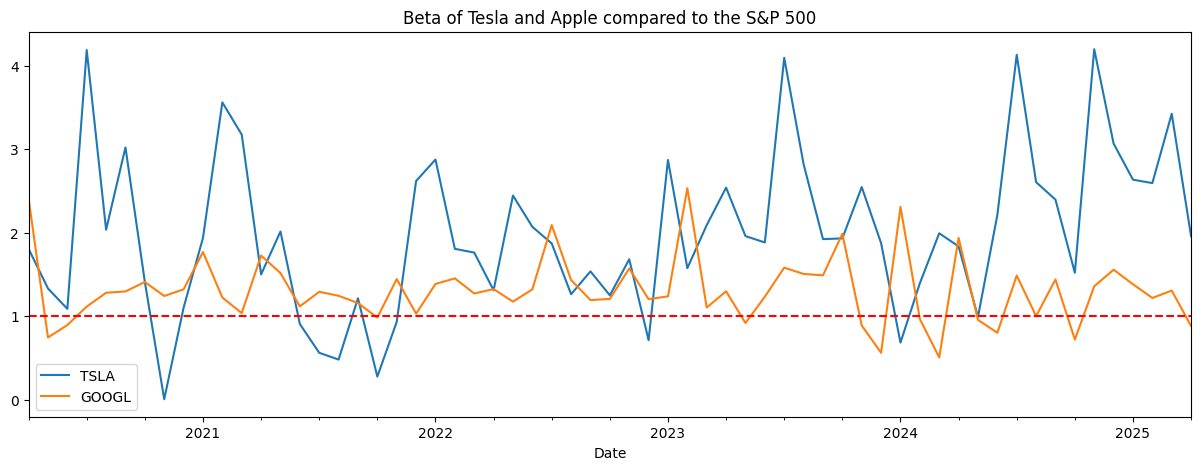

In [9]:
beta_plot = companies.performance.get_beta(period="monthly").plot(
    figsize=(15, 5), title="Beta of Tesla and Apple compared to the S&P 500"
)
beta_plot.axhline(y=1.0, color="red", linestyle="--")

<Axes: title={'center': 'Maximum Drawdown for each Quarter'}>

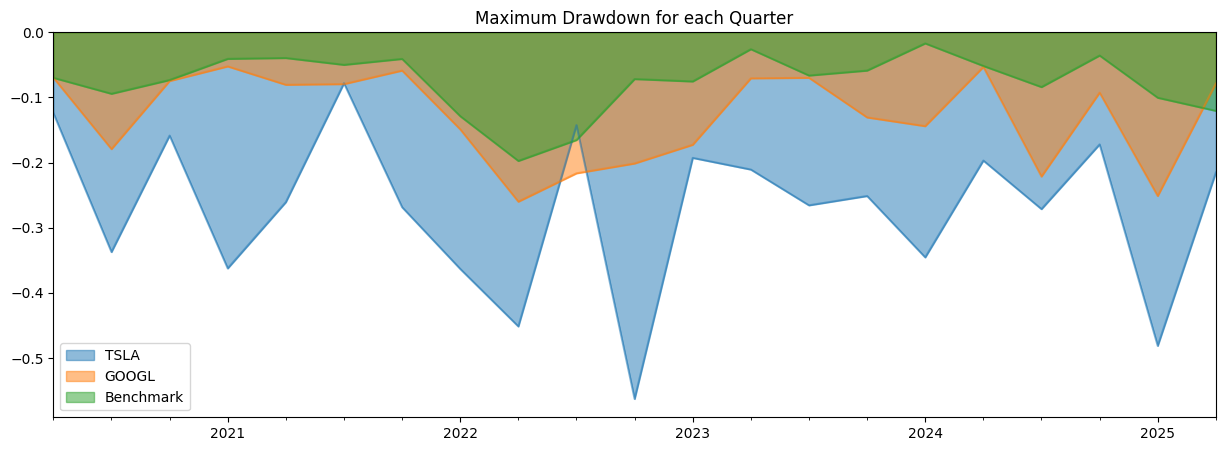

In [10]:
companies.risk.get_maximum_drawdown(period="quarterly").plot.area(
    figsize=(15, 5), title="Maximum Drawdown for each Quarter", stacked=False
)

And lastly, the historical data can be viewed which includes OHLC, Volume, Dividends, Volatility and (Cumulative) Returns.

In [11]:
companies.get_historical_data()

Open                      High                       Low  \
              TSLA   GOOGL Benchmark    TSLA   GOOGL Benchmark    TSLA   
Date                                                                     
2020-04-28 53.0427 63.8547  270.5843 53.6667 63.9323  270.9376  50.446   
2020-04-29  52.678   66.93  271.0586 53.5467 67.6839  274.1733 52.2107   
2020-04-30 57.0127 66.2513  271.2259  57.988 67.1788  272.7229    50.9   
2020-05-01 50.3333 65.8895  265.2753  51.518   67.25  270.2496  45.536   
2020-05-04 46.7333 65.0953  261.0262    50.8 65.9084  263.9643 46.5333   
...            ...     ...       ...     ...     ...       ...     ...   
2025-04-21  230.26  148.88    521.16  232.21  148.95     521.7  222.79   
2025-04-22  230.96  148.89    520.14  242.79  152.19     529.3  229.85   
2025-04-23  254.86  155.61    540.43  259.45  157.53    545.43  244.43   
2025-04-24   250.5  156.15    536.72  259.54  159.59    547.43   249.2   
2025-04-25  261.69  165.07    546.65  286.85   166.1    551.05  259.63   

                               Close  ... Volatility Excess Return          \
             GOOGL Benchmark    TSLA  ...  Benchmark          TSLA   GOOGL   
Date                                  ...                                    
2020-04-28 61.2263  265.3589 51.2747  ...     0.0114           NaN     NaN   
2020-04-29 66.0209  270.0172 53.3673  ...     0.0114        0.0345  0.0826   
2020-04-30 65.7606   268.325 52.1253  ...     0.0114       -0.0295 -0.0028   
2020-05-01 65.1714  261.7514 46.7547  ...     0.0114       -0.1094 -0.0282   
2020-05-04 64.4922  259.5292  50.746  ...     0.0114         0.079 -0.0022   
...            ...       ...     ...  ...        ...           ...     ...   
2025-04-21   146.1    508.46   227.5  ...     0.0114       -0.1016 -0.0672   
2025-04-22  148.54    519.19  237.97  ...     0.0114        0.0021 -0.0182   
2025-04-23  153.81    533.88  250.74  ...     0.0114        0.0098 -0.0183   
2025-04-24  155.79    535.45  259.51  ...     0.0114        -0.008 -0.0177   
2025-04-25  161.04    543.69  284.95  ...     0.0114        0.0553 -0.0259   

                     Excess Volatility                  Cumulative Return  \
           Benchmark              TSLA  GOOGL Benchmark              TSLA   
Date                                                                        
2020-04-28       NaN            0.0436 0.0244    0.0182               1.0   
2020-04-29    0.0199            0.0436 0.0244    0.0182            1.0408   
2020-04-30   -0.0155            0.0436 0.0244    0.0182            1.0166   
2020-05-01   -0.0329            0.0436 0.0244    0.0182            0.9118   
2020-05-04   -0.0036            0.0436 0.0244    0.0182            0.9897   
...              ...               ...    ...       ...               ...   
2025-04-21   -0.0679            0.0436 0.0244    0.0182            4.4369   
2025-04-22   -0.0179            0.0436 0.0244    0.0182            4.6411   
2025-04-23   -0.0284            0.0436 0.0244    0.0182            4.8901   
2025-04-24    -0.022            0.0436 0.0244    0.0182            5.0612   
2025-04-25   -0.0355            0.0436 0.0244    0.0182            5.5573   

                             
            GOOGL Benchmark  
Date                         
2020-04-28    1.0       1.0  
2020-04-29 1.0889    1.0262  
2020-04-30 1.0926    1.0166  
2020-05-01 1.0687    0.9897  
2020-05-04 1.0733    0.9924  
...           ...       ...  
2025-04-21 2.4075    1.9343  
2025-04-22 2.4695    1.9846  
2025-04-23 2.5328    2.0154  
2025-04-24 2.5968    2.0578  
2025-04-25 2.6405    2.0727  

[1256 rows x 36 columns]

It is also possible to still include your Financial Modeling Prep key and run the related functionality.

In [ ]:
# initialize the Toolkit
companies = Toolkit(
    tickers=["TSLA", "GOOGL"],
    balance=balance_sheets,
    income=income_statements,
    cash=cash_flow_statements,
    api_key="FMP_KEY",
    format_location="external_datasets",
    reverse_dates=True,  # Important when the dates are descending
)

# Show the Analyst Estimates from Financial Modeling Prep
companies.get_analyst_estimates()

Obtaining analyst estimates: 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]


date                                          2020           2021  \
TSLA  Estimated Revenue Low          27692715855.0  47198352032.0   
      Estimated Revenue High         34928362656.0  59530497666.0   
      Estimated Revenue Average      31102527304.0  53009897638.0   
      Estimated EBITDA Low           15740985249.0   6222540492.0   
      Estimated EBITDA High          23611477872.0   9333810739.0   
      Estimated EBITDA Average       19676231561.0   7778175616.0   
      Estimated EBIT Low              6292253089.0  10078959157.0   
      Estimated EBIT High             9438379634.0  15118438736.0   
      Estimated EBIT Average          7865316362.0  12598698947.0   
      Estimated Net Income Low        1746428838.0   3641422676.0   
      Estimated Net Income High       2619643259.0   5462134014.0   
      Estimated Net Income Average    2183036049.0   4551778345.0   
      Estimated SGA Expense Low      12365515385.0   2939271443.0   
      Estimated SGA Expense High     18548273078.0   4408907166.0   
      Estimated SGA Expense Average  15456894232.0   3674089305.0   
      Estimated EPS Average                 0.8152         2.1452   
      Estimated EPS High                    0.9455         2.4883   
      Estimated EPS Low                      0.699         1.8395   
      Number of Analysts                      18.0           16.0   
GOOGL Estimated Revenue Low         174947208573.0 249147657584.0   
      Estimated Revenue High        181344295878.0 258257944798.0   
      Estimated Revenue Average     177785668701.0 253189995257.0   
      Estimated EBITDA Low           36199309683.0  64461779570.0   
      Estimated EBITDA High          54298964526.0  96692669355.0   
      Estimated EBITDA Average       45249137105.0  80577224463.0   
      Estimated EBIT Low             24208375544.0  48990664306.0   
      Estimated EBIT High            36312563316.0  73485996460.0   
      Estimated EBIT Average         30260469430.0  61238330383.0   
      Estimated Net Income Low       23401409380.0  47335069755.0   
      Estimated Net Income High      35102114072.0  71002604636.0   
      Estimated Net Income Average   29251761726.0  59168837196.0   
      Estimated SGA Expense Low      17790419858.0  22821906759.0   
      Estimated SGA Expense High     26685629787.0  34232860140.0   
      Estimated SGA Expense Average  22238024823.0  28527383450.0   
      Estimated EPS Average                 2.6168         5.4287   
      Estimated EPS High                    2.6849         5.5699   
      Estimated EPS Low                     2.5625          5.316   
      Number of Analysts                      18.0           21.0   

date                                          2022           2023  \
TSLA  Estimated Revenue Low          74600636515.0  96190538085.0   
      Estimated Revenue High         92343265986.0  98865824947.0   
      Estimated Revenue Average      82141808957.0  97458304621.0   
      Estimated EBITDA Low            8451256459.0   9503646657.0   
      Estimated EBITDA High          12676884692.0  14255469991.0   
      Estimated EBITDA Average       10564070576.0  11879558324.0   
      Estimated EBIT Low             12587376985.0  13981202161.0   
      Estimated EBIT High            18881065481.0  20971803245.0   
      Estimated EBIT Average         15734221234.0  17476502703.0   
      Estimated Net Income Low        5460936341.0  11999199998.0   
      Estimated Net Income High       8191404512.0  17998800001.0   
      Estimated Net Income Average    6826170427.0  14999000000.0   
      Estimated SGA Expense Low       3049942310.0   3455119556.0   
      Estimated SGA Expense High      4574913468.0   5182679336.0   
      Estimated SGA Expense Average   3812427889.0   4318899447.0   
      Estimated EPS Average                 3.9558         3.0665   
      Estimated EPS High                    4.5945         3.1829   
      Estimated EPS Low                     3.4837         2.9306 